In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import tensorflow.keras as K
from tensorflow.keras.layers import Dense, Flatten


In [2]:
((train_data, train_labels),(test_data, test_labels)) = tf.keras.datasets.mnist.load_data()

In [3]:
train_data = train_data/np.float32(255)
train_labels = train_labels.astype(np.int32)  
test_data = test_data/np.float32(255)
test_labels = test_labels.astype(np.int32)


In [4]:
train_labels

array([5, 0, 4, ..., 5, 6, 8], dtype=int32)

In [5]:
model = K.Sequential([
                      # Dense(64,  activation='relu'),
                      # Dense(32,  activation='relu'),
                      Flatten(input_shape=(28, 28)),
                      Dense(10, activation='sigmoid')
])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 10)                7850      
                                                                 
Total params: 7,850
Trainable params: 7,850
Non-trainable params: 0
_________________________________________________________________


In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])


In [7]:
history = model.fit(x=train_data,y=train_labels, epochs=50, verbose=1, validation_split=0.2)

Epoch 1/50


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 0.5146 - accuracy: 0.8656 - val_loss: 0.3221 - val_accuracy: 0.9124
Epoch 2/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3173 - accuracy: 0.9121 - val_loss: 0.2860 - val_accuracy: 0.9215
Epoch 3/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2941 - accuracy: 0.9180 - val_loss: 0.2745 - val_accuracy: 0.9238
Epoch 4/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2813 - accuracy: 0.9216 - val_loss: 0.2712 - val_accuracy: 0.9252
Epoch 5/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2736 - accuracy: 0.9228 - val_loss: 0.2683 - val_accuracy: 0.9251
Epoch 6/50
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2682 - accuracy: 0.9253 - val_loss: 0.2674 - val_accuracy: 0.9274
Epoch 7/50
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2643 - accuracy: 0.9260 - val_loss: 0.2686 - val_accuracy: 0.9266
Epo

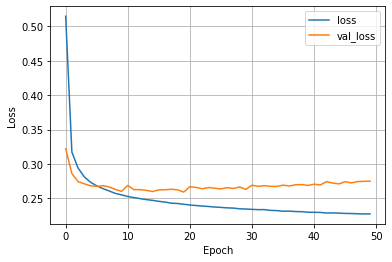

In [8]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

In [9]:
predictions = model.predict(test_data)

In [10]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("Pred {} Conf: {:2.0f}% True ({})".format(predicted_label,
                                100*np.max(predictions_array),
                                true_label),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

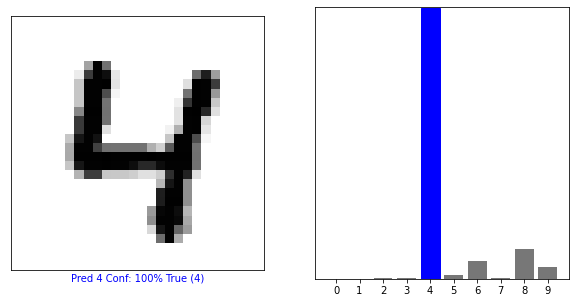

In [11]:
i = 56
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

In [16]:
better_model = K.Sequential([
                      Flatten(input_shape=(28, 28)),
                      Dense(128,  activation='relu'),
                      #Dense(64,  activation='relu'),
                      Dense(10, activation='softmax')
])
better_model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_2 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 10)                1290      
                                                                 
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [17]:
better_model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [18]:
history = better_model.fit(x=train_data,y=train_labels, epochs=10, verbose=1, validation_split=0.2)

Epoch 1/10


/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1096: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


1500/1500 [==============================] - 5s 3ms/step - loss: 0.2869 - accuracy: 0.9181 - val_loss: 0.1477 - val_accuracy: 0.9579
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1264 - accuracy: 0.9629 - val_loss: 0.1152 - val_accuracy: 0.9656
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0875 - accuracy: 0.9735 - val_loss: 0.0952 - val_accuracy: 0.9706
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0643 - accuracy: 0.9805 - val_loss: 0.0931 - val_accuracy: 0.9708
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0488 - accuracy: 0.9853 - val_loss: 0.0937 - val_accuracy: 0.9724
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0377 - accuracy: 0.9886 - val_loss: 0.0924 - val_accuracy: 0.9724
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.0302 - accuracy: 0.9906 - val_loss: 0.1089 - val_accuracy: 0.9701
Epo

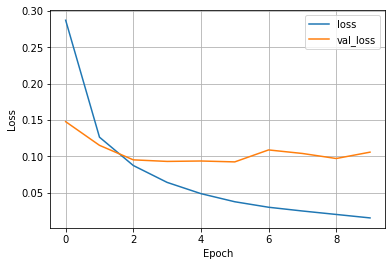

In [19]:
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True)

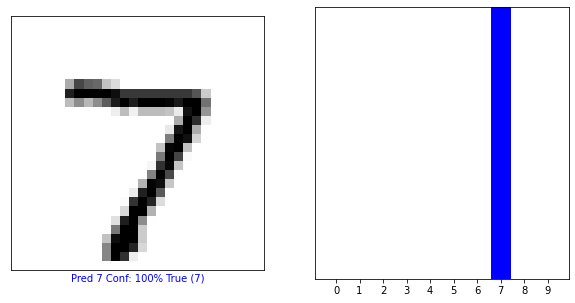

In [20]:
predictions = better_model.predict(test_data)
i = 0
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_data)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()